# Dijkstra's Single Source Shortest Path Algorithm


--- content here -----

```
pseudocodes (if any)

```

## Fetching required modules

In [3]:
import os, sys
from os.path import dirname, join, abspath

sys.path.insert(0, abspath(join(dirname("modules"), '..')))
from modules.create_graph_from_adjMatrix import *
from modules.visualize_graph import *


## Building the graph

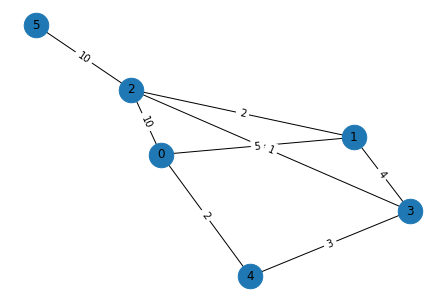

In [4]:
a = Node()
b = Node()
c = Node()
d = Node()
e = Node()
f = Node()

graphs = Graph.create_from_nodeList([a, b, c, d, e, f])


graphs.connect(a,b,5)
graphs.connect(a,c,10)
graphs.connect(a,e,2)
graphs.connect(b,c,2)
graphs.connect(b,d,4)
graphs.connect(c,d,1)
graphs.connect(c,f,10)
graphs.connect(d,e,3)

adjancentMatrix = graphs.get_adjMatrix()
visualizeGraph(adjancentMatrix)

## Implementing the shortest path algorithm

In [5]:
def dijkstra(graph, sourceNode, nodeList):
    nodenum = graph.get_nodeIndex(sourceNode) 

    # Make an array keeping track of distance from node to any node
    # in self.nodes. Initialize to infinity for all nodes but the 
    # starting node, keep track of "path" which relates to distance.
    # Index 0 = distance, index 1 = node hops
    dist = [None] * len(nodeList)
    for i in range(len(dist)):
        dist[i] = [float("inf")]
        dist[i].append([nodeList[nodenum]])
    
    dist[nodenum][0] = 0
    # Queue of all nodes in the graph
    # Note the integers in the queue correspond to indices of node
    # locations in the self.nodes array
    queue = [i for i in range(len(nodeList))]
    # Set of numbers seen so far
    seen = set()
    while len(queue) > 0:
        # Get node in queue that has not yet been seen
        # that has smallest distance to starting node
        min_dist = float("inf")
        min_node = None
        for n in queue: 
            if dist[n][0] < min_dist and n not in seen:
                min_dist = dist[n][0]
                min_node = n
        
        # Add min distance node to seen, remove from queue
        queue.remove(min_node)
        seen.add(min_node)
        # Get all next hops 
        connections = graph.connectionsFrom(min_node)
        # For each connection, update its path and total distance from 
        # starting node if the total distance is less than the current distance
        # in dist array
        print("current node %s" % min_node)
        for (node, weight) in connections: 
            tot_dist = weight + min_dist
            if tot_dist < dist[node.index][0]:
                dist[node.index][0] = tot_dist
                dist[node.index][1] = list(dist[min_node][1])
                dist[node.index][1].append(node)
                print("Distance from Node %s to Node %s is of weight %d" % (min_node, node.index, weight))
        print("-------------------------------------------------")
    return dist  

## Connecting all the dots

In [6]:
print([(weight, [n.index for n in node]) for (weight, node) in dijkstra(graphs, a, [a, b, c, d, e, f])])
#adjancentMatrix = graphs.get_adjMatrix()
# visualizeGraph(adjancentMatrix)
# print(a)

current node 0
Distance from Node 0 to Node 1 is of weight 5
Distance from Node 0 to Node 2 is of weight 10
Distance from Node 0 to Node 4 is of weight 2
-------------------------------------------------
current node 4
Distance from Node 4 to Node 3 is of weight 3
-------------------------------------------------
current node 1
Distance from Node 1 to Node 2 is of weight 2
-------------------------------------------------
current node 3
Distance from Node 3 to Node 2 is of weight 1
-------------------------------------------------
current node 2
Distance from Node 2 to Node 5 is of weight 10
-------------------------------------------------
current node 5
-------------------------------------------------
[(0, [0]), (5, [0, 1]), (6, [0, 4, 3, 2]), (5, [0, 4, 3]), (2, [0, 4]), (16, [0, 4, 3, 2, 5])]
